In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001050743"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001050743
SIC,6029
Description,"COMMERCIAL BANKS, NEC"
Name,PEAPACK GLADSTONE FINANCIAL CORP
Ticker,PGC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,3.0,1.174000e+01,1.148956e+00,10.49,1.123500e+01,11.98,1.236500e+01,12.75
interest income,50.0,2.162340e+07,9.155571e+06,13400000.00,1.477375e+07,17236500.00,2.770425e+07,44563000.00
net income,50.0,3.816580e+06,6.101015e+06,-32619000.00,2.147750e+06,3232000.00,5.462500e+06,11910000.00
net interest income,50.0,1.690232e+07,6.949487e+06,7855000.00,1.219250e+07,12870500.00,2.326225e+07,30007000.00
provision for loan losses,50.0,1.409780e+06,9.243408e+05,0.00,6.375000e+05,1500000.00,2.000000e+06,4525000.00
total revenue,22.0,3.129914e+07,7.231736e+06,19501000.00,2.580950e+07,31714000.00,3.876925e+07,41736000.00


# Plots

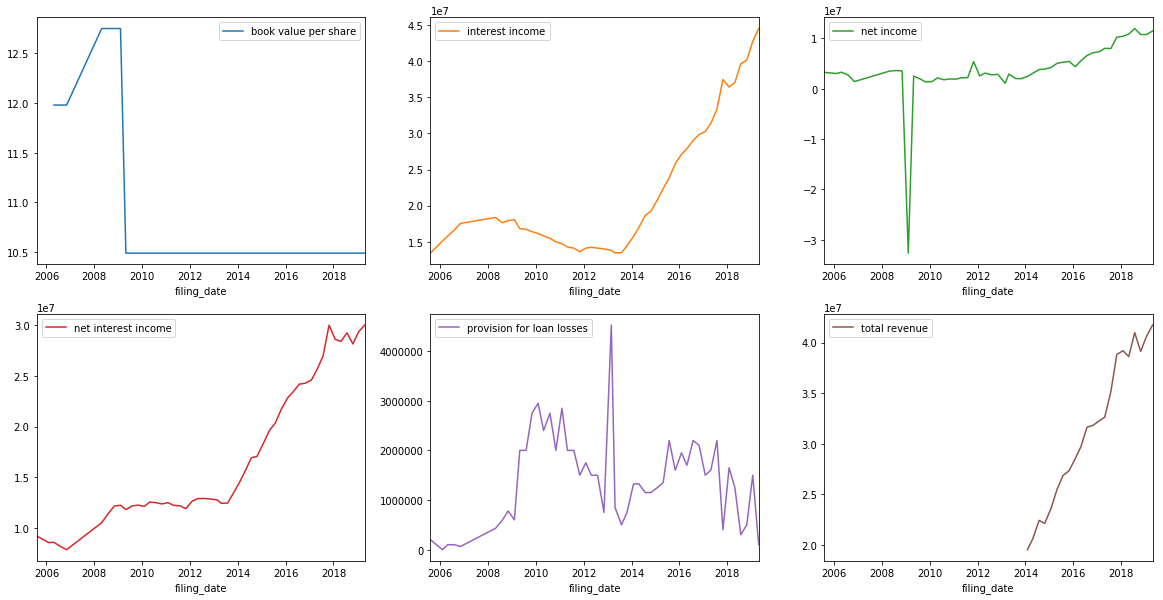

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001050743 book value per share        2005Q2 to 2005Q4: 3 periods  missing   
           book value per share        2006Q2 to 2007Q4: 7 periods  missing   
           book value per share        2008Q2 to 2008Q4: 3 periods  missing   
           book value per share       2009Q2 to 2019Q1: 40 periods  missing   
           interest income                                  2005Q3  missing   
           interest income             2006Q4 to 2007Q4: 5 periods  missing   
           net income                                       2005Q3  missing   
           net income                  2006Q4 to 2007Q4: 5 periods  missing   
           net interest income                              2005Q3  missing   
           net interest income         2006Q4 to 2007Q4: 5 periods  missing   
           provision for loan losses                        2005Q3  missing   
           provision for loan losses   2006Q4 to 2007Q4: 5 periods  missing   
           total revenue              2005Q2 to 2013Q3: 34 periods  missing   

                                             message  
cik        item                                       
0001050743 book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           book value per share       Missing period  
           interest income            Missing period  
           interest income            Missing period  
           net income                 Missing period  
           net income                 Missing period  
           net interest income        Missing period  
           net interest income        Missing period  
           provision for loan losses  Missing period  
           provision for loan losses  Missing period  
           total revenue              Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()